In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation

In [6]:

data = pd.read_csv('House-dataset.csv')
data







,date,price,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,month,quartile_zone
0,2014-09-26,305000.0,2,1,False,76.18046,False,False,True,1,False,True,9,2
1,2014-05-14,498000.0,3,2,True,210.88981,False,False,False,2,True,True,5,2
2,2015-03-23,590000.0,2,4,False,262.91549,False,False,False,2,True,False,3,2
3,2014-07-15,775000.0,3,3,False,159.79316,False,False,False,1,True,False,7,3
4,2015-04-14,350000.0,2,1,False,92.90300,False,False,False,1,True,True,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6695,2014-12-11,730000.0,3,3,True,188.59309,False,False,False,2,True,False,12,3
6696,2014-06-24,518000.0,3,4,False,234.11556,False,False,False,2,True,False,6,2
6697,2014-06-18,264000.0,3,2,True,169.08346,False,False,False,1,True,True,6,1
6698,2015-02-02,612125.0,1,2,True,155.14801,False,False,False,1,True,True,2,4


In [10]:
data = data.dropna()


In [14]:
train_input = np.array(data.price[0:500]).reshape(500, 1)
train_output = np.array(data.grade[0:500]).reshape(500, 1)

In [24]:
test_input = np.array(data.price[500:700]).reshape(200, 1)
test_output = np.array(data.grade[500:700]).reshape(200, 1)

In [26]:
class LinearRegression: 
    def __init__(self): 
        self.parameters = {} 

    def forward_propagation(self, train_input): 
        m = self.parameters['m'] 
        c = self.parameters['c'] 
        predictions = np.multiply(m, train_input) + c 
        return predictions 

    def cost_function(self, predictions, train_output): 
        cost = np.mean((train_output - predictions) ** 2) 
        return cost 

    def backward_propagation(self, train_input, train_output, predictions): 
        derivatives = {} 
        df = (predictions-train_output) 
        # dm= 2/n * mean of (predictions-actual) * input 
        dm = 2 * np.mean(np.multiply(train_input, df)) 
        # dc = 2/n * mean of (predictions-actual) 
        dc = 2 * np.mean(df) 
        derivatives['dm'] = dm 
        derivatives['dc'] = dc 
        return derivatives 

    def update_parameters(self, derivatives, learning_rate): 
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm'] 
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc'] 

    def train(self, train_input, train_output, learning_rate, iters): 
        # Initialize random parameters 
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1

        # Initialize loss 
        self.loss = [] 

        # Initialize figure and axis for animation 
        fig, ax = plt.subplots() 
        x_vals = np.linspace(min(train_input), max(train_input), 100) 
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals +
                        self.parameters['c'], color='red', label='Regression Line') 
        ax.scatter(train_input, train_output, marker='o', 
                color='green', label='Training Data') 

        # Set y-axis limits to exclude negative values 
        ax.set_ylim(0, max(train_output) + 1) 

        def update(frame): 
            # Forward propagation 
            predictions = self.forward_propagation(train_input) 

            # Cost function 
            cost = self.cost_function(predictions, train_output) 

            # Back propagation 
            derivatives = self.backward_propagation( 
                train_input, train_output, predictions) 

            # Update parameters 
            self.update_parameters(derivatives, learning_rate) 

            # Update the regression line 
            line.set_ydata(self.parameters['m'] 
                        * x_vals + self.parameters['c']) 

            # Append loss and print 
            self.loss.append(cost) 
            print("Iteration = {}, Loss = {}".format(frame + 1, cost)) 

            return line, 
        # Create animation 
        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True) 

        # Save the animation as a video file (e.g., MP4) 
        ani.save('linear_regression_A.gif', writer='ffmpeg') 

        plt.xlabel('Input') 
        plt.ylabel('Output') 
        plt.title('Linear Regression') 
        plt.legend() 
        plt.show() 

        return self.parameters, self.loss 

MovieWriter ffmpeg unavailable; using Pillow instead.


Iteration = 1, Loss = 231563901268.6288
Iteration = 1, Loss = 6.39594748998898e+26
Iteration = 1, Loss = 1.7666028284525536e+42
Iteration = 1, Loss = 4.879473382765277e+57
Iteration = 2, Loss = 1.3477426906403408e+73
Iteration = 3, Loss = 3.722554090755335e+88
Iteration = 4, Loss = 1.0281939612683293e+104
Iteration = 5, Loss = 2.8399394507499224e+119
Iteration = 6, Loss = 7.844099836938228e+134
Iteration = 7, Loss = 2.1665920460243115e+150
Iteration = 8, Loss = 5.98426994999602e+165
Iteration = 9, Loss = 1.652894780082817e+181
Iteration = 10, Loss = 4.565404262932428e+196
Iteration = 11, Loss = 1.260994730890085e+212
Iteration = 12, Loss = 3.482950511618456e+227
Iteration = 13, Loss = 9.620138743815784e+242
Iteration = 14, Loss = 2.6571456913196514e+258
Iteration = 15, Loss = 7.339211432306333e+273
Iteration = 16, Loss = 2.0271385428378525e+289
Iteration = 17, Loss = 5.599090188041408e+304
Iteration = 18, Loss = inf
Iteration = 19, Loss = inf


C:\Users\Yazdani kalyal\AppData\Local\Temp\ipykernel_13592\222342918.py:12: RuntimeWarning: overflow encountered in square
  cost = np.mean((train_output - predictions) ** 2)


Iteration = 20, Loss = inf


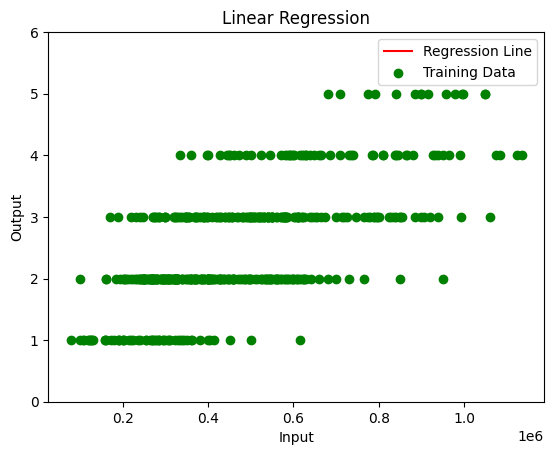

In [28]:
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)